# Scatterplots and Linear Regression
**Course:** Math for Data Science  
**Assignment:** Scatterplots and Linear Regression  
**Name:** Matthew Scarpello  

In [1]:
# Data handling and numerical computation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Linear regression model and error metric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Reading Notes: Dataset

This dataset contains two variables:
- **weight**: the weight of the vehicle in pounds (independent variable)
- **hwy_mpg**: highway miles per gallon (dependent variable)

The goal of this assignment is to understand how vehicle weight influences highway fuel efficiency and to model this relationship using linear regression.

In [2]:
LinearRegression

sklearn.linear_model._base.LinearRegression

In [3]:
df = pd.read_csv("car_data.csv")
df.head()

,weight,hwy_mpg
0,2548,27
1,2548,27
2,2823,26
3,2337,30
4,2824,22


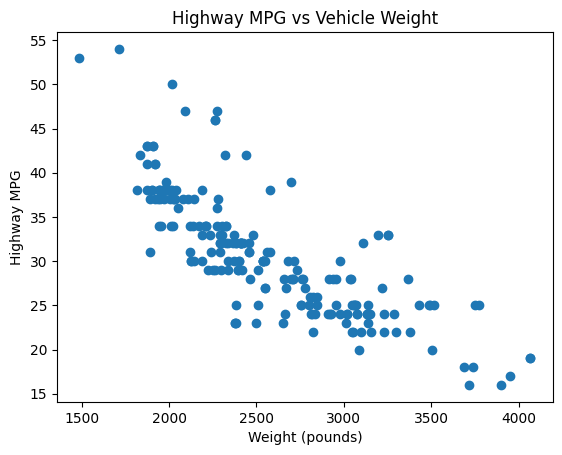

In [4]:
# Create a scatterplot to visualize the relationship
# between vehicle weight (x-axis) and highway MPG (y-axis)

plt.figure()
plt.scatter(df["weight"], df["hwy_mpg"])
plt.xlabel("Weight (pounds)")
plt.ylabel("Highway MPG")
plt.title("Highway MPG vs Vehicle Weight")
plt.show()

## Question 2: Trend

The scatterplot shows a clear negative relationship between vehicle weight and highway miles per gallon. As the weight of a vehicle increases, highway mpg generally decreases. Lighter vehicles tend to have higher fuel efficiency, while heavier vehicles tend to have lower highway mpg.

## Question 3: Expected Slope

If a linear model were used to predict highway miles per gallon from vehicle weight, the slope would be negative. This is because increasing vehicle weight is associated with lower fuel efficiency, resulting in fewer miles per gallon on the highway.

## Question 4: Interpretation of Slope −0.05

A slope of −0.05 means that for every additional pound of vehicle weight, the predicted highway miles per gallon decreases by 0.05 mpg. In practical terms, this means that an increase of 100 pounds in vehicle weight is associated with a decrease of about 5 mpg in highway fuel efficiency.

## Question 5: Manual Fit Line

By visually inspecting the scatterplot, a reasonable manual fit line has a slope of approximately −0.01 and a y-intercept of approximately 55. This line follows the general downward trend of the data and passes through the center of the point cloud.

In [5]:
# Define predictor (X) and response (y)
X = df[["weight"]]
y = df["hwy_mpg"]

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract slope and intercept
m_best = model.coef_[0]
b_best = model.intercept_

m_best, b_best

(np.float64(-0.010547157168719581), np.float64(57.70517422574473))

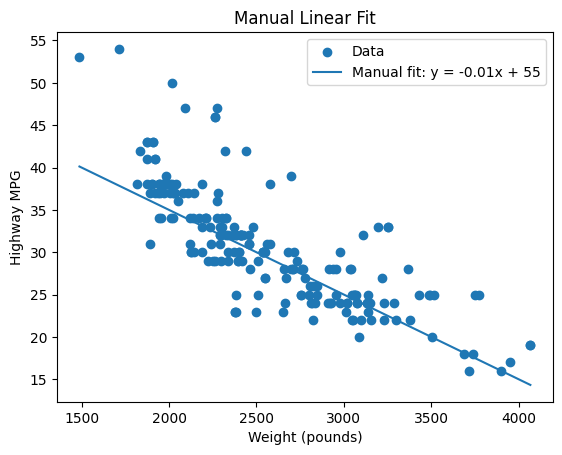

(-0.01, 55)

In [6]:
# Manually chosen slope and intercept based on visual inspection
m_manual = -0.01
b_manual = 55

# Use minimum and maximum weights to draw the line across the plot
x_vals = np.array([df["weight"].min(), df["weight"].max()])
y_vals = m_manual * x_vals + b_manual

# Plot the data and the manually fitted line
plt.figure()
plt.scatter(df["weight"], df["hwy_mpg"], label="Data")
plt.plot(x_vals, y_vals, label=f"Manual fit: y = {m_manual}x + {b_manual}")
plt.xlabel("Weight (pounds)")
plt.ylabel("Highway MPG")
plt.title("Manual Linear Fit")
plt.legend()
plt.show()

m_manual, b_manual

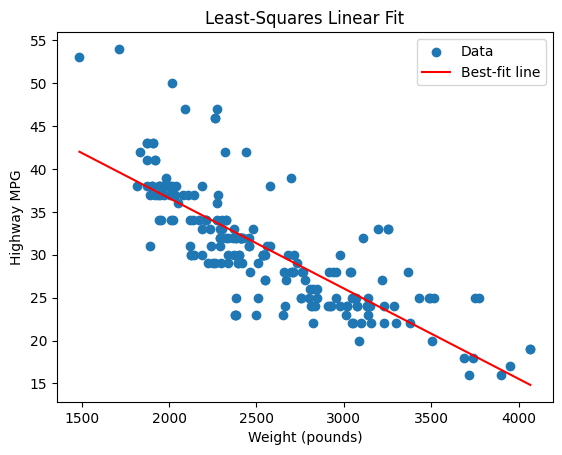

In [7]:
x_vals = np.array([df["weight"].min(), df["weight"].max()])
y_best = m_best * x_vals + b_best

plt.figure()
plt.scatter(df["weight"], df["hwy_mpg"], label="Data")
plt.plot(x_vals, y_best, color="red", label="Best-fit line")
plt.xlabel("Weight (pounds)")
plt.ylabel("Highway MPG")
plt.title("Least-Squares Linear Fit")
plt.legend()
plt.show()

## Question 6: Least-Squares Line

Using scikit-learn’s LinearRegression, the best-fit (least-squares) line has a slope of approximately −0.01055 and a y-intercept of approximately 57.71. This line minimizes the sum of squared differences between the predicted and actual highway miles per gallon values.

In [8]:
# Predictions from the manually fitted line
y_manual = m_manual * df["weight"].values + b_manual

# Predictions from the least-squares model
y_best = model.predict(X)

# Compute RMSE for both models
rmse_manual = np.sqrt(mean_squared_error(y, y_manual))
rmse_best = np.sqrt(mean_squared_error(y, y_best))

rmse_manual, rmse_best

(np.float64(4.355325139776677), np.float64(4.144895442072008))

## Question 7: RMSE Comparison

The root mean squared error (RMSE) of the manually fitted line is approximately 4.36, while the RMSE of the least-squares regression line is approximately 4.14. The least-squares line has a lower RMSE, which is expected because it is specifically computed to minimize the sum of squared prediction errors. The manually fitted line is a reasonable approximation but does not perform quite as well as the optimal least-squares solution.

In [9]:
prediction_3200 = model.predict(np.array([[3200]]))[0]
prediction_3200

/Users/mattscarpello/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(23.95427128584207)

In [10]:
# Predict highway MPG for a 3200-pound vehicle
prediction_3200 = model.predict(pd.DataFrame({"weight": [3200]}))[0]
prediction_3200

np.float64(23.95427128584207)

## Question 8: Prediction at 3200 Pounds

Using the least-squares regression line, the predicted highway miles per gallon for a vehicle weighing 3200 pounds is approximately 23.95 mpg.